In [2]:
!pip install --quiet mesa

In [2]:
import mesa
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
class MoneyAgent(mesa.Agent):
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()

In [4]:
class MoneyModel(mesa.Model):
   

    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        
        self.grid = mesa.space.MultiGrid(width, height, True)
        self.schedule = mesa.time.RandomActivation(self)
        

        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

In [13]:
model = MoneyModel(1000, 10, 10)
for i in range(100):
    model.step()

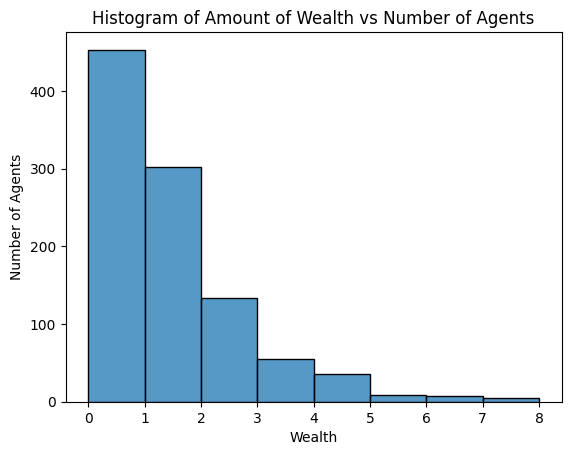

In [14]:
import matplotlib.pyplot as plt
wealth_values = [agent.wealth for agent in model.schedule.agents]

# Plot histogram
sns.histplot(wealth_values, bins=range(max(wealth_values)+1), kde=False)
plt.xlabel('Wealth')
plt.ylabel('Number of Agents')
plt.title('Histogram of Amount of Wealth vs Number of Agents')
plt.show()

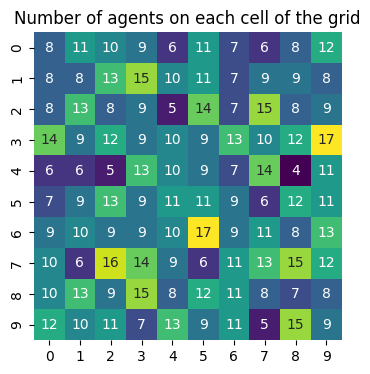

In [15]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");